<h1> Wine Quality Classification Model </h1>

In [44]:
# Making sure the code is compatible with all Python versions and on different devices 
from __future__ import division, print_function, unicode_literals

# Loading necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets 
from sklearn import linear_model 

wine = pd.read_csv('C:\\Users\\nirja\\OneDrive\\Desktop\\MSBA\\Intro to Business Analytics\\winequality-red.csv')

In [45]:
# Making sure the code is compatible with all Python versions and on different devices 
from __future__ import division, print_function, unicode_literals

# Loading necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets 
from sklearn import linear_model 

wine = pd.read_csv('C:\\Users\\nirja\\OneDrive\\Desktop\\MSBA\\Intro to Business Analytics\\winequality-red.csv')

<h2> Data Exploration </h2>

In [48]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [49]:
np.shape(wine)

(1599, 12)

In [50]:
wine.isnull().sum() #No null values so no cleaning required 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
wine.dtypes # All data types seem to match as well 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<h3> Distribution of Target Variable </h3>

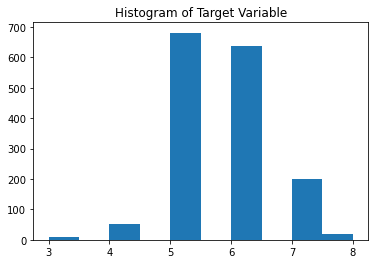

In [52]:
plt.hist(wine['quality'])
plt.title("Histogram of Target Variable")
plt.show() # Does not explain a lot because the target variable is factored 

<h3> Correlation Matrix </h3>

<AxesSubplot:>

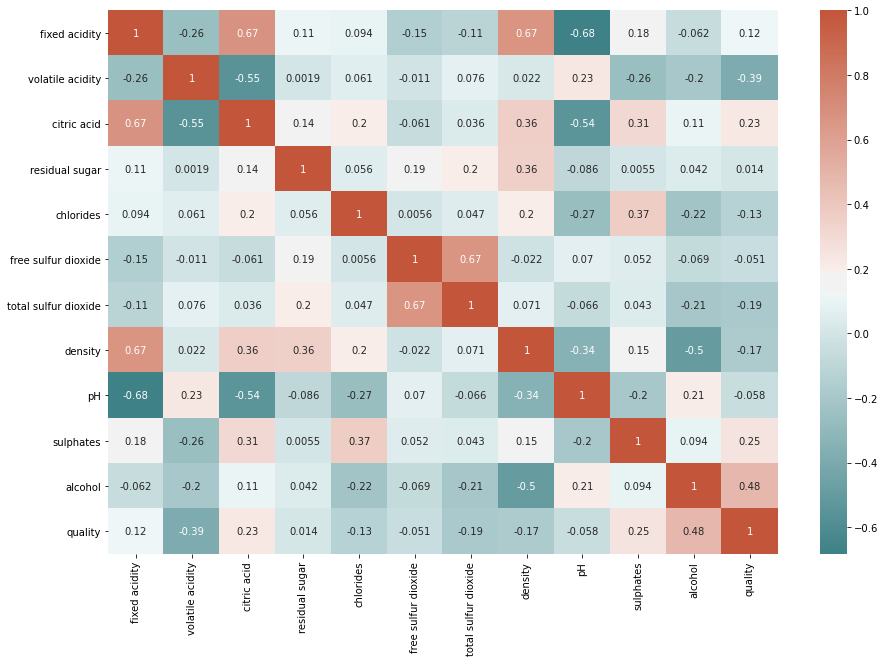

In [99]:
corr = wine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
           annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

<h3> Creating Binary Target variable </h3>

In [53]:
# Create binary target variable 
wine['goodquality'] = [1 if x>= 7 else 0 for x in wine['quality']]

In [54]:
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

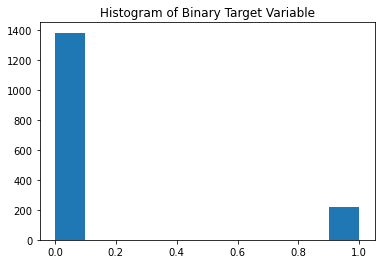

In [113]:
plt.hist(wine['goodquality'])
plt.title("Histogram of Binary Target Variable")
plt.show()

<h3> Creating an Interaction Term </h3>

In [55]:
# Creating an interaction term - molecular sulphur dioxide 
# A research paper highlights the importance of high sulphur dioxide in wine and if it is not present, it can cause the wine
# to go bad. Such a wine requires the pH to be higher. In order to calculate this relationship, we create a new variable 
# called molecular sulphur dioxide. 
# Source - http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf
wine['molecular sulphur dioxide'] = wine['free sulfur dioxide']/(1+10**(wine['pH']-1.8))

<h3> Balancing the Data </h3>

In [25]:
from sklearn.utils import resample
# Separate majority and minority classes
wine_majority = wine[wine.goodquality==0]
wine_minority = wine[wine.goodquality==1]
 
# Upsample minority class
wine_minority_upsampled = resample(wine_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
wine_upsampled = pd.concat([wine_majority, wine_minority_upsampled])
 
# Display new class counts
wine_upsampled.goodquality.value_counts() # We tried to make the ratio of not good wines to good wines as 2:1 since this fits
# a more real-world scenario. 

0    1382
1     700
Name: goodquality, dtype: int64

In [56]:
# Predicting the accuracy of the model that always predicts the majority class ~66%
y_pred = np.zeros(y.shape[0])
np.mean(y_pred == y) * 100

66.37848222862632

In [57]:
# Assigning the features to X and the new balanced target variable to y
X = wine_upsampled.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,13]]
y = wine_upsampled.goodquality

<h3> Standardizing the Data </h3>

In [58]:
from sklearn.preprocessing import StandardScaler
# Normalize Data
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X) # All our features standardized in X

<h2> Optimal Models </h2>

In [101]:
# Import parameters and gridsearch to build the most optimal classifier models for our dataset
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

np.random.seed(42) 

inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

<h3> Decision Tree </h3>

In [131]:
# Choosing the most optimal parameters - depth, minimum samples in leaf, minimum samples for split, and maximum features
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': range(1,20), 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5,6],
                              'min_samples_split':[2,3,4,5],
                              'max_features':['int', 'float', 'auto', 'sqrt', 'log2', 'None']}],
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt = gs_dt.fit(X_std,y)
print("\n Parameter Tuning")
print("Non-nested CV Recall: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)

nested_score_gs_dt = cross_val_score(gs_dt, X=X_std, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


 Parameter Tuning
Non-nested CV Recall:  0.9785430713155548
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)
Nested CV Recall:  0.9723994346878223  +/-  0.014739705351635005


<h3> Logistic Regression </h3>

In [120]:
#Logistic Regression 
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Choosing optimal C parameter and penalty (l1/l2) for regularization in Logistic Regression
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='recall',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X_std,y)
print("\n Parameter Tuning")
print("Non-nested CV Recall: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X_std, y=y, cv=outer_cv)
print("Nested CV Recall:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


 Parameter Tuning
Non-nested CV Recall:  0.7453438126627843
Optimal Parameter:  {'C': 1e-05, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1e-05, random_state=42, solver='liblinear')
Nested CV Recall: 0.7360892020665728  +/-  0.04149172410253456


<h3> kNN </h3>

In [125]:
#### k-NN Model
# Choosing k for kNN and type of distance
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn = gs_knn.fit(X_std, y)  
print("\n Parameter Tuning")
print("Non-nested CV Recall: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_std, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 Parameter Tuning
Non-nested CV Recall:  0.9896261741252326
Optimal Parameter:  {'n_neighbors': 9, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=9, weights='distance')
Nested CV Recall:  0.9871133225456106  +/-  0.008074565197074671


<h2> Model Evaluation </h2>

<h3> Learning Curve </h3>

In [95]:
#### Learning Curve
# Creating the function to visualize learning curve for logistic regression 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #x label title
    plt.ylabel("Score")             #y label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_std, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

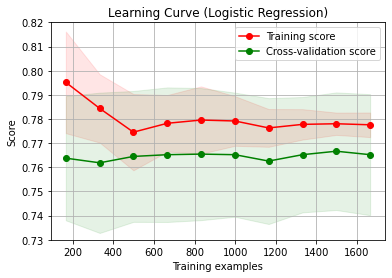

In [96]:
# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator 
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt


title = "Learning Curve (Logistic Regression)"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)
estimator = LogisticRegression(C=0.0001, random_state=42, solver='liblinear') # Building LR using optimal parameters from above model
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X_std, y, (0.73, 0.82), cv=cv, n_jobs=4)

plt.show() # Display the figure

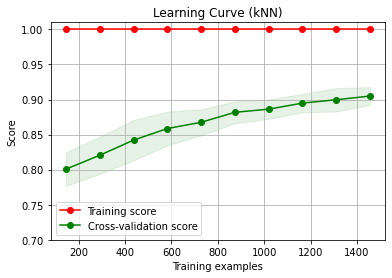

In [97]:
title = "Learning Curve (kNN)"

# Plots the learning curve based on the previously defined function for the kNN classifier. Uses the 
# random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsClassifier(n_neighbors=9, weights='distance') #n_neighbors=5 by default
plot_learning_curve(estimator, title, X_std, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

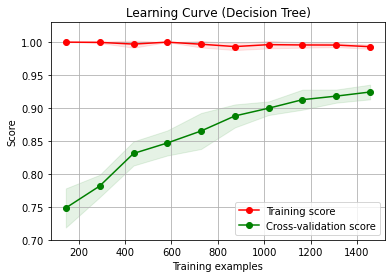

In [98]:
title = "Learning Curve (Decision Tree)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeClassifier(max_depth=13, max_features='auto', random_state=42)
plot_learning_curve(estimator, title, X_std, y, (0.7, 1.03), cv=cv, n_jobs=4)

plt.show() # Display the figure

<h3> Fitting Graph </h3>

In [99]:
#### Fitting curve (aka validation curve)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#print(y)              
y = le.fit_transform(y) 
#print(y)               
print(le.classes_)      

[0 1]


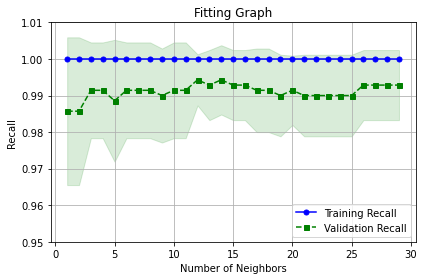

In [114]:
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve

np.random.seed(42) #the seed used by the random number generator for np

############################# Parameters - Varying Complexity #############################

# Specify possible parameter values for number of neighbors
# Lesser number of neighbors means a more complex model 
param_range = range(1,30)


# Determine training and test scores for varying parameter values on our optimal model derived from above
train_scores, test_scores = validation_curve( 
                estimator=KNeighborsClassifier(metric='minkowski', weights='distance', p=2), 
                X=X_std, 
                y=y, 
                param_name="n_neighbors",
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="recall",
                n_jobs=4)

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot training recall means of cross-validation for all the number of neighbors in param range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training Recall')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test recall means of cross-validation for all the number of neighbors in param range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation Recall')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.title("Fitting Graph")
plt.legend(loc='lower right')
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall')
plt.ylim([0.95, 1.01]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

<h3> ROC & AUC Curve </h3>

10-fold cross validation:

ROC AUC: 0.85 (+/- 0.08) [Logistic regression]
ROC AUC: 0.94 (+/- 0.03) [Decision tree]
ROC AUC: 0.99 (+/- 0.01) [kNN]


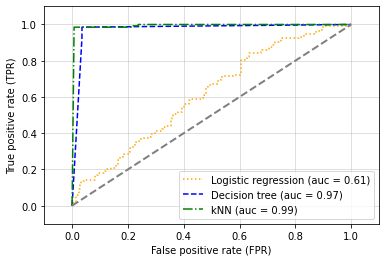

In [109]:
# Importing libraries and packages for ROC and AUC curve evaluation

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Building three different classifier models to evaluate 

# Logistic Regression Classifier
clf1 = LogisticRegression(C=0.0001, random_state=42, solver='liblinear', penalty='l2') 

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42, criterion='gini', 
                              max_depth=13,
                              max_features='auto',
                              min_samples_leaf= 1, 
                              min_samples_split= 2)

# kNN Classifier
clf3 = KNeighborsClassifier(n_neighbors=9,
                            weights='distance',
                            p=2,
                            metric='minkowski')

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_std,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()